In [3]:
import zipfile
with zipfile.ZipFile("archive.zip","r") as f:
    f.extractall(".")


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree,export_graphviz

In [5]:
df = pd.read_csv("glass.csv")

In [6]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [8]:
scaler = StandardScaler()
x = scaler.fit_transform(df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]])
df[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]] = x
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


In [9]:
train,test = train_test_split(df,test_size=0.4)

In [10]:
params = {"ccp_alpha":[0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.2, 0.8],
          "criterion":["gini","entropy"],
                       }

In [11]:
cl = DecisionTreeClassifier()
grid = GridSearchCV(cl,params,verbose=3,cv=3)

In [17]:
grid.fit(train[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]],train["Type"])
best = grid.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ...ccp_alpha=0.005, criterion=gini;, score=0.651 total time=   0.0s
[CV 2/3] END ...ccp_alpha=0.005, criterion=gini;, score=0.651 total time=   0.0s
[CV 3/3] END ...ccp_alpha=0.005, criterion=gini;, score=0.500 total time=   0.0s
[CV 1/3] END ccp_alpha=0.005, criterion=entropy;, score=0.674 total time=   0.0s
[CV 2/3] END ccp_alpha=0.005, criterion=entropy;, score=0.581 total time=   0.0s
[CV 3/3] END ccp_alpha=0.005, criterion=entropy;, score=0.619 total time=   0.0s
[CV 1/3] END ....ccp_alpha=0.01, criterion=gini;, score=0.651 total time=   0.0s
[CV 2/3] END ....ccp_alpha=0.01, criterion=gini;, score=0.581 total time=   0.0s
[CV 3/3] END ....ccp_alpha=0.01, criterion=gini;, score=0.548 total time=   0.0s
[CV 1/3] END .ccp_alpha=0.01, criterion=entropy;, score=0.721 total time=   0.0s
[CV 2/3] END .ccp_alpha=0.01, criterion=entropy;, score=0.628 total time=   0.0s
[CV 3/3] END .ccp_alpha=0.01, criterion=entropy;

[Text(0.3581081081081081, 0.9375, 'x[2] <= -0.093\nentropy = 2.203\nsamples = 128\nvalue = [37, 48, 10, 7, 7, 19]'),
 Text(0.16216216216216217, 0.8125, 'x[7] <= 0.453\nentropy = 1.868\nsamples = 38\nvalue = [0, 7, 0, 7, 7, 17]'),
 Text(0.26013513513513514, 0.875, 'True  '),
 Text(0.10810810810810811, 0.6875, 'x[5] <= -0.687\nentropy = 1.877\nsamples = 22\nvalue = [0, 6, 0, 7, 7, 2]'),
 Text(0.08108108108108109, 0.5625, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 7, 0]'),
 Text(0.13513513513513514, 0.5625, 'x[8] <= -0.175\nentropy = 1.429\nsamples = 15\nvalue = [0, 6, 0, 7, 0, 2]'),
 Text(0.08108108108108109, 0.4375, 'x[6] <= 0.71\nentropy = 0.863\nsamples = 7\nvalue = [0, 0, 0, 5, 0, 2]'),
 Text(0.05405405405405406, 0.3125, 'x[3] <= 2.219\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 0, 1, 0, 2]'),
 Text(0.02702702702702703, 0.1875, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2]'),
 Text(0.08108108108108109, 0.1875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]

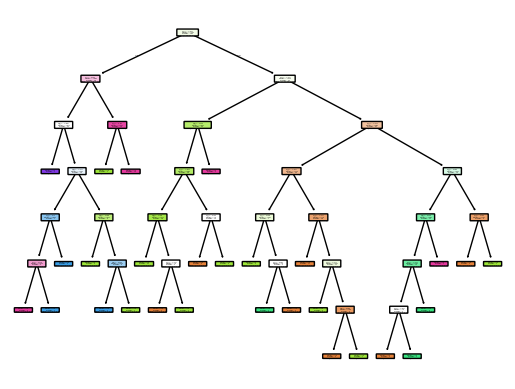

In [22]:
model = DecisionTreeClassifier(ccp_alpha=best["ccp_alpha"],criterion=best["criterion"])
model.fit(train[["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]],train["Type"])
plot_tree(model,filled=True,rounded=True)

In [27]:
import graphviz
dot_data = export_graphviz(model,out_file=None,
                                filled=True,rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Glass type")

'Glass type.pdf'